In [2]:
import pandas as pd 
import numpy as np 
import torch
import networkx as nx
import matplotlib.pyplot as plt
from text_preprocess import preprocess_text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ash_3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_15_train=pd.read_csv(r'dataset\twitter15\twitter15.train',sep='\t',names=['tweet_id','context','label'])
df_15_test=pd.read_csv(r'dataset\twitter15\twitter15.test',sep='\t',names=['tweet_id','context','label'])
df_15_dev=pd.read_csv(r'dataset\twitter15\twitter15.dev',sep='\t',names=['tweet_id','context','label'])
df_15_total=pd.concat([df_15_train,df_15_dev,df_15_test],ignore_index=True)
df_15_total.shape

(1490, 3)

In [4]:
df_15_total.head()

,tweet_id,context,label
0,724703995147751424,"american family association gets 500,000 to si...",unverified
1,358591089462099968,this week's top story: george zimmerman wins f...,false
2,775672628493357057,clinton hides failing health? full disclosure ...,unverified
3,364589696573124609,fukushima: highly radioactive water seeping in...,false
4,549927969032916993,a transgender 17-year old left a suicide note ...,unverified


In [5]:
df_15_total['label'].value_counts()

label
non-rumor     374
unverified    373
true          372
false         371
Name: count, dtype: int64

In [6]:
df_15_total['class']=df_15_total['label'].replace({'false':0,'true':1,'unverified':2,'non-rumor':3})

df_15_total.head()

,tweet_id,context,label,class
0,724703995147751424,"american family association gets 500,000 to si...",unverified,2
1,358591089462099968,this week's top story: george zimmerman wins f...,false,0
2,775672628493357057,clinton hides failing health? full disclosure ...,unverified,2
3,364589696573124609,fukushima: highly radioactive water seeping in...,false,0
4,549927969032916993,a transgender 17-year old left a suicide note ...,unverified,2


In [7]:
df_15_total['tokens']=df_15_total['context'].apply(preprocess_text)
df_15_total.head()

,tweet_id,context,label,class,tokens
0,724703995147751424,"american family association gets 500,000 to si...",unverified,2,american famili associ get 500000 sign petit b...
1,358591089462099968,this week's top story: george zimmerman wins f...,false,0,week top stori georg zimmerman win florida sta...
2,775672628493357057,clinton hides failing health? full disclosure ...,unverified,2,clinton hide health full disclosur covert doct...
3,364589696573124609,fukushima: highly radioactive water seeping in...,false,0,highli radioact water seep ocean url
4,549927969032916993,a transgender 17-year old left a suicide note ...,unverified,2,17year old left note tumblr plead fix societi ...


Applying TFIDF on the processed text

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df_15_total['tokens'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the original DataFrame with the TF-IDF DataFrame

result_df = pd.concat([df_15_total, tfidf_df], axis=1)

tfidf_df.head()

,10,100,10000,1030,11,1201,1214,129,12th,12yearold,...,youth,youthday,youtubeasksobama,yr,zaevion,zayn,zaynmalik,zika,zimmerman,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343602,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [9]:
tfidf_df.shape

(1490, 3164)

In [10]:
result_df.head()

,tweet_id,context,label,class,tokens,10,100,10000,1030,11,...,youth,youthday,youtubeasksobama,yr,zaevion,zayn,zaynmalik,zika,zimmerman,zone
0,724703995147751424,"american family association gets 500,000 to si...",unverified,2,american famili associ get 500000 sign petit b...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,358591089462099968,this week's top story: george zimmerman wins f...,false,0,week top stori georg zimmerman win florida sta...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343602,0.0
2,775672628493357057,clinton hides failing health? full disclosure ...,unverified,2,clinton hide health full disclosur covert doct...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,364589696573124609,fukushima: highly radioactive water seeping in...,false,0,highli radioact water seep ocean url,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,549927969032916993,a transgender 17-year old left a suicide note ...,unverified,2,17year old left note tumblr plead fix societi ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [16]:
X=result_df.iloc[:,5:]
X.head()

,10,100,10000,1030,11,1201,1214,129,12th,12yearold,...,youth,youthday,youtubeasksobama,yr,zaevion,zayn,zaynmalik,zika,zimmerman,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343602,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [18]:
y=result_df['class']
y.head()

0    2
1    0
2    2
3    0
4    2
Name: class, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Setting up Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter = 50)# Fitting on the training set
pac.fit(x_train, y_train)# Predicting on the test set
y_pred = pac.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 79.87%


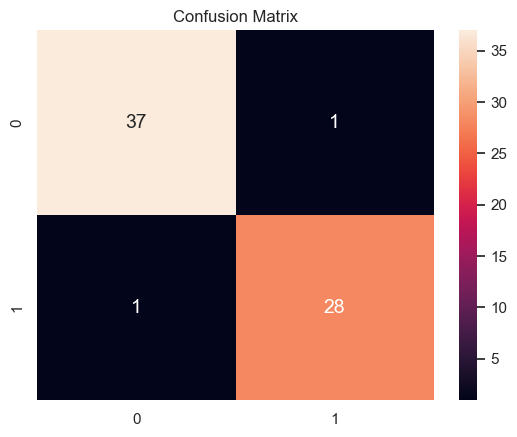


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        45
           1       0.27      0.97      0.42        30
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        36

    accuracy                           0.44       149
   macro avg       0.29      0.45      0.32       149
weighted avg       0.32      0.44      0.34       149



d:\Mtech\Main Project\Fake-News-Detection\myenv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Mtech\Main Project\Fake-News-Detection\myenv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Mtech\Main Project\Fake-News-Detection\myenv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [23]:
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative
import seaborn as sn
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))